In [1]:
import random
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 1s 0us/step


In [28]:
X = x_train[:2000]
y = y_train[:2000]

In [29]:
X = X.reshape(2000, 784)
X = (X - X.min()) / (X.max()-X.min())

In [30]:
inputs = keras.Input((784,))
x = keras.layers.Dense(
    units=512,
    activation='sigmoid'
)(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(
    units=128,
    activation='sigmoid'
)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(
    units=64,
    activation='sigmoid'
)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(units=24,
    activation='sigmoid')(x)
outputs = keras.layers.BatchNormalization()(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [31]:
def m_loss(a, b):
  return -keras.losses.MSE(a, b)

model.compile(loss=m_loss)

In [32]:
for _ in range(20):
   X_ = X + np.random.normal(loc=0., scale=0.000001, size=(2000, 784))
   Y_ = model(X_)
   model.fit(X, Y_, batch_size=500,verbose=0)

In [33]:
Y = model.predict(X)

63/63 [==============================] - 0s 3ms/step


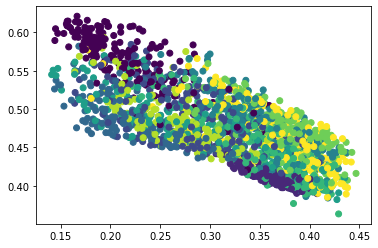

In [34]:
plt.scatter(Y[:,0], Y[:,1], c=y)
plt.show()